In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('../data/clean/stats_salaries.csv')
df.head()

,PLAYER_ID,PLAYER_NAME,START_POSITION,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,...,TO,PF,PTS,PLUS_MINUS,TEAM_ABBREVIATION,TEAM_NAME,GAME_DATE_EST,SEASON_START,WON_GAME,INFLATION_ADJ_SALARY
0,1630162,Anthony Edwards,F,36:22,4.0,10.0,0.400,3.0,8.0,0.375,...,1.0,1.0,15.0,5.0,MIN,Minnesota Timberwolves,2022-03-12,2021,1,10245480
1,1630162,Anthony Edwards,F,34:27,9.0,19.0,0.474,4.0,11.0,0.364,...,0.0,3.0,25.0,-3.0,MIN,Minnesota Timberwolves,2022-03-11,2021,0,10245480
2,1630162,Anthony Edwards,F,25:29,7.0,15.0,0.467,2.0,8.0,0.250,...,4.0,2.0,16.0,7.0,MIN,Minnesota Timberwolves,2022-03-09,2021,1,10245480
3,1630162,Anthony Edwards,F,32:22,7.0,13.0,0.538,1.0,5.0,0.200,...,4.0,5.0,17.0,7.0,MIN,Minnesota Timberwolves,2022-02-28,2021,1,10245480
4,1630162,Anthony Edwards,F,37:46,5.0,13.0,0.385,1.0,6.0,0.167,...,2.0,3.0,15.0,-21.0,MIN,Minnesota Timberwolves,2022-02-25,2021,0,10245480


In [3]:
df.columns

Index(['PLAYER_ID', 'PLAYER_NAME', 'START_POSITION', 'MIN', 'FGM', 'FGA',
       'FG_PCT', 'FG3M', 'FG3A', 'FG3_PCT', 'FTM', 'FTA', 'FT_PCT', 'OREB',
       'DREB', 'REB', 'AST', 'STL', 'BLK', 'TO', 'PF', 'PTS', 'PLUS_MINUS',
       'TEAM_ABBREVIATION', 'TEAM_NAME', 'GAME_DATE_EST', 'SEASON_START',
       'WON_GAME', 'INFLATION_ADJ_SALARY'],
      dtype='object')

In [4]:
g = df.groupby(['PLAYER_NAME']).mean()

In [5]:
g.head()

,PLAYER_ID,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,...,AST,STL,BLK,TO,PF,PTS,PLUS_MINUS,SEASON_START,WON_GAME,INFLATION_ADJ_SALARY
PLAYER_NAME,,,,,,,,,,,,,,,,,,,,,
AJ Hammons,1627773.0,1.172414,2.620690,0.307724,0.172414,0.413793,0.132172,0.310345,0.689655,0.129310,...,0.241379,0.034483,0.551724,0.482759,1.172414,2.827586,0.068966,2016.000000,0.206897,7.327350e+05
AJ Price,201985.0,2.101818,5.501818,0.336516,0.847273,2.643636,0.245520,0.803636,1.080000,0.304898,...,2.120000,0.465455,0.032727,0.865455,0.901818,5.854545,-0.200000,2011.141818,0.458182,8.798785e+05
Aaron Brooks,201166.0,3.458156,8.405674,0.376238,1.245390,3.404255,0.305699,1.421277,1.709220,0.454323,...,2.902128,0.541844,0.133333,1.531915,1.882270,9.582979,-0.470922,2011.912057,0.548936,2.184101e+06
Aaron Gordon,203932.0,4.836268,10.656690,0.448171,1.095070,3.399648,0.281278,2.019366,2.910211,0.524752,...,2.436620,0.739437,0.607394,1.478873,1.985915,12.786972,-0.397887,2017.487676,0.443662,1.271276e+07
Aaron Gray,201189.0,1.411972,2.778169,0.410856,0.000000,0.010563,0.000000,0.584507,1.038732,0.218954,...,0.619718,0.313380,0.295775,0.827465,2.133803,3.408451,-0.957746,2009.397887,0.397887,1.569532e+06


In [9]:
g.columns

Index(['PLAYER_ID', 'FGM', 'FGA', 'FG_PCT', 'FG3M', 'FG3A', 'FG3_PCT', 'FTM',
       'FTA', 'FT_PCT', 'OREB', 'DREB', 'REB', 'AST', 'STL', 'BLK', 'TO', 'PF',
       'PTS', 'PLUS_MINUS', 'SEASON_START', 'WON_GAME',
       'INFLATION_ADJ_SALARY'],
      dtype='object')

In [11]:
g[['FG_PCT', 'FG3_PCT', 'TO', 'OREB', 'REB', 'AST','PLUS_MINUS', 'PTS', 'INFLATION_ADJ_SALARY']].corr()

,FG_PCT,FG3_PCT,TO,OREB,REB,AST,PLUS_MINUS,PTS,INFLATION_ADJ_SALARY
FG_PCT,1.000000,0.197060,0.456827,0.554723,0.626575,0.291712,0.151458,0.557768,0.430543
FG3_PCT,0.197060,1.000000,0.365610,-0.274993,0.027242,0.477733,0.134429,0.514446,0.267548
TO,0.456827,0.365610,1.000000,0.328988,0.578059,0.820880,0.158022,0.857792,0.705557
OREB,0.554723,-0.274993,0.328988,1.000000,0.881857,0.020038,0.134015,0.381662,0.455658
REB,0.626575,0.027242,0.578059,0.881857,1.000000,0.286150,0.225271,0.656843,0.656006
AST,0.291712,0.477733,0.820880,0.020038,0.286150,1.000000,0.223889,0.700518,0.557683
PLUS_MINUS,0.151458,0.134429,0.158022,0.134015,0.225271,0.223889,1.000000,0.266341,0.343653
PTS,0.557768,0.514446,0.857792,0.381662,0.656843,0.700518,0.266341,1.000000,0.783315
INFLATION_ADJ_SALARY,0.430543,0.267548,0.705557,0.455658,0.656006,0.557683,0.343653,0.783315,1.000000


In [7]:
g['PTS'].values

array([ 2.82758621,  5.85454545,  9.58297872, ...,  3.52201258,
       12.25112782,  3.875     ])

<Figure size 1080x720 with 0 Axes>

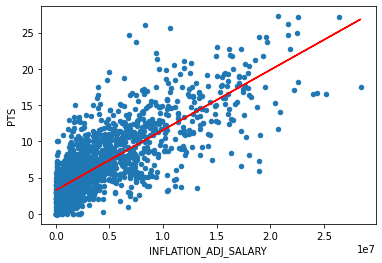

In [8]:
plt.figure(figsize=(15,10))
x = g['INFLATION_ADJ_SALARY'].values
y = g['PTS'].values
g.plot.scatter(y='PTS', x='INFLATION_ADJ_SALARY')
a,b = np.polyfit(x,y, 1)
plt.plot(x, a*x+b, 'r')